In [1]:
from petrel_well_file_readers import *
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import lasio

In [2]:
folder=r"D:\SoftwareWebApps\Python\geophysics\inversion&spect_decomp\d11_data\\"
dev_file=folder+'nec25_a1_dev.dat'


In [3]:
# dev=read_dev(dev_file)

# X=dev['MD'].values
# X.shape=len(X),1
# y=dev['Z'].values
# md2tvdss = LinearRegression().fit(X, y)
# y.shape=len(y),1
# X.shape=len(X)
# tvdss2md=LinearRegression().fit(y, X)

# plt.plot(dev['MD'].values,y)
# newmd=np.array([[3],[300],[2500]])
# plt.plot(newmd,md2tvdss.predict(newmd),'*')

In [5]:
las_file=folder+'nec25_a1.las'
las=lasio.read(las_file)

well_tops_file=folder+'d11_welltops_payzones_220519_sai.dat'
wt=read_welltops(well_tops_file)
wt=wt.sort_values(['MD'])

chkt_file=folder+"nec25_a1_chkt.dat"
chkt=read_chkt(chkt_file)
X=chkt['MD'].values
X.shape=len(X),1
y=chkt['TWT picked'].values
md2twt = LinearRegression().fit(X, y)

In [13]:
sand_tops=[s for s in wt[wt.Well=='NEC25-A1'].Surface.values if 'sand' in s.lower()]

drange=wt[wt.Surface.isin(sand_tops)].MD.values
sand_tops
req_tops=['Sand Pay3_Top', 'Sand Pay3_Bottom']

['Sand Pay4_Top',
 'Sand Pay4_Bottom',
 'Sand Pay3_Top',
 'Sand Pay3_Bottom',
 'Sand Pay2_Top',
 'Sand Pay2_Bottom',
 'Sand1_Top',
 'Sand1_Bottom',
 'Sand 0 Top',
 'Sand 0 Bottom',
 'Sand-1_Top',
 'Sand-1_Bottom']

In [11]:
# drange,len(drange),
ldf=las.df()
i=2
drangeindx=(ldf.index>drange[i]) & (ldf.index<drange[i+1])
drange[i],drange[i+1],ldf[drangeindx]['AI'].values,ldf[drangeindx]['SWE_INDO_Q'].values

ldf[drangeindx].index

Float64Index([1963.9788, 1964.1312, 1964.2836,  1964.436, 1964.5884, 1964.7408,
              1964.8932, 1965.0456,  1965.198, 1965.3504,
              ...
              1977.9996,  1978.152, 1978.3044, 1978.4568, 1978.6092, 1978.7616,
               1978.914, 1979.0664, 1979.2188, 1979.3712],
             dtype='float64', name='DEPT', length=102)

In [210]:
1/ldf[drangeindx]['DTCO'].values
np.array(ldf[drangeindx].index)
# 10**6*1/ldf[drangeindx]['DTCO'].values
from random import random as rnd


In [14]:
import matplotlib.colors as mcolors
# mcolors.BASE_COLORS
# mcolors.TABLEAU_COLORS
# mcolors.CSS4_COLORS.keys()
# mcolors.XKCD_COLORS
# dir(mcolors)

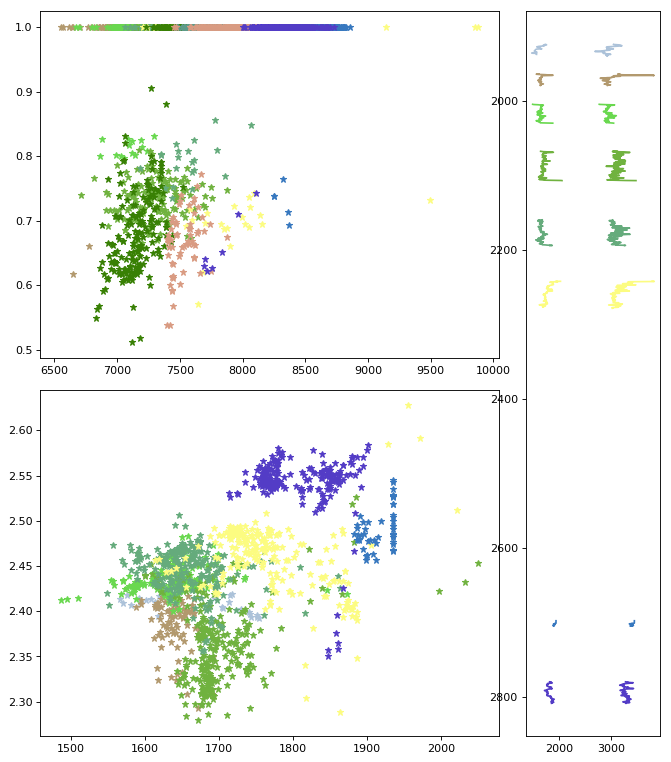

In [238]:
from matplotlib import gridspec
clrs=[ 'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']
ldf=las.df()
drange=wt[wt.Surface.isin(sand_tops)].MD.values
plt.figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')
# gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
gs = gridspec.GridSpec(4, 4)
ax0 = plt.subplot(gs[0:2, 0:3])
ax3 = plt.subplot(gs[2:, 0:3])
# ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[:,3:])
color_list=list(mcolors.XKCD_COLORS.keys())
for i in range(0,len(drange)-1,2):
#     print(i)
    drangeindx=(ldf.index>drange[i]) & (ldf.index<drange[i+1])
    a,b=0.3048*10**6/ldf[drangeindx]['DTCO'].values,np.array(ldf[drangeindx].index)
    c,d=0.3048*10**6/ldf[drangeindx]['DTSM'].values,np.array(ldf[drangeindx].index)
    color=color_list[i]
    ax0.plot(ldf[drangeindx]['AI'],ldf[drangeindx]['SWE_INDO_Q'],'*',color=color)
    ax3.plot(c,ldf[drangeindx]['RHOB'].values,'*',color=color)
    ax1.plot(a,b,c,d,color=color) #
ax1.invert_yaxis()
#     plt.plot(10^6/ldf[drangeindx]['DTSM'].values,np.array(ldf[drangeindx].index))


In [64]:
newmd=las['DEPT']
# newmd.shape=len(newmd),1
# plt.plot(newmd,md2tvdss.predict(newmd),'*')
newtvdss=md2tvdss.predict(newmd)
newtvdss.shape=len(newtvdss),1
newmd,tvdss2md.predict(newtvdss)

(array([[ 728.0148],
        [ 728.1672],
        [ 728.3196],
        ...,
        [3749.6496],
        [3749.802 ],
        [3749.9544]]),
 array([ 728.12128164,  728.2736697 ,  728.42605777, ..., 3749.51947121,
        3749.67185927, 3749.82424734]))

In [68]:
# las.add_curve('TVDSS',newtvdss)

In [73]:
# las.keys()
# las['TVDSS'],las['DEPT']